In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

(750, 2)
(750,)


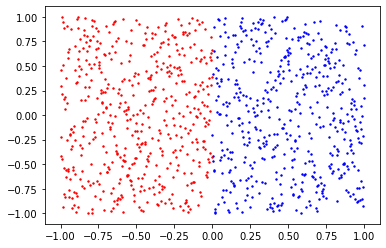

In [2]:
##### Création de l'ensemble de points

nb = 1000

nb = nb//2
x1 = np.linspace(0,1,nb)
y1 = np.linspace(-1,1,nb)
np.random.shuffle(y1)
x2 = np.linspace(-1,0,nb)
y2 = np.linspace(-1,1,nb)
np.random.shuffle(y2)

plt.scatter(x1.reshape((-1,1)), y1, color='blue', s=2)
plt.scatter(x2.reshape((-1,1)), y2, color='red', s=2)
#plt.show()

points_x = np.concatenate([x1, x2], axis=0)
points_y = np.concatenate([y1, y2], axis=0)
classes = np.array([1]*nb + [0]*nb)

data = pd.DataFrame({'X': points_x, 'Y': points_y, 'Class': classes}).sample(frac = 1).reset_index(drop=True)

X_train, X_test = train_test_split(data, shuffle=True)

y_train = X_train.pop('Class')
y_test = X_test.pop('Class')

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)

In [3]:
class Perceptron(object):

    def __init__(self, no_of_inputs, bias=False):
        self.bias = bias
        if self.bias:
            self.weights = np.random.rand(no_of_inputs + 1)
        else:
            self.weights = np.random.rand(no_of_inputs)
           
    def predict(self, inputs):
        if self.bias:
            result = np.dot(inputs, self.weights[1:]) + self.weights[0]
        else:
            result = np.dot(inputs, self.weights[:])

        if result > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def train(self, training_inputs, labels, epochs=100, learning_rate=0.01):
        self.training_accuracies = []
        self.training_losses = []
        for i in range(epochs):
            errors = []
            accuracy = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                errors.append(abs(label - prediction))
                if self.bias:
                    self.weights[1:] += learning_rate * (label - prediction) * inputs
                    self.weights[0] += learning_rate * (label - prediction)
                else:
                    self.weights[:] += learning_rate * (label - prediction) * inputs
                if prediction == label:
                    accuracy+=1
            self.accuracy = accuracy/len(labels)
            self.training_accuracies.append(self.accuracy)

            self.loss = sum(errors)/len(errors)
            self.training_losses.append(self.loss)

            if i%10 == 0:
                accuracy = "%.4f" % self.accuracy 
                loss = "%.5f" % self.loss
                print(f"Epoch {i} :\t\tLoss = {loss}\t\tAccuracy = {accuracy}")

In [4]:
###### Entrainement du modèle

# lr = .00001
P = Perceptron(2)
P.train(X_train, y_train, learning_rate=0.0001, epochs=1000)

#print(P.predict(np.array([-0.5,0.5])))
#print(P.predict(np.array([0.5,0.5])))
print(P.weights)
a = P.weights[0]/P.weights[1]

# w0 * x + w1 * y
# y = (w0/w1) * x

print("Pente = " +str(a))

Epoch 0 :		Loss = 0.18267		Accuracy = 0.8173
Epoch 10 :		Loss = 0.15067		Accuracy = 0.8493
Epoch 20 :		Loss = 0.13467		Accuracy = 0.8653
Epoch 30 :		Loss = 0.12133		Accuracy = 0.8787
Epoch 40 :		Loss = 0.10533		Accuracy = 0.8947
Epoch 50 :		Loss = 0.09200		Accuracy = 0.9080
Epoch 60 :		Loss = 0.08400		Accuracy = 0.9160
Epoch 70 :		Loss = 0.07600		Accuracy = 0.9240
Epoch 80 :		Loss = 0.06667		Accuracy = 0.9333
Epoch 90 :		Loss = 0.06400		Accuracy = 0.9360
Epoch 100 :		Loss = 0.05333		Accuracy = 0.9467
Epoch 110 :		Loss = 0.04400		Accuracy = 0.9560
Epoch 120 :		Loss = 0.03867		Accuracy = 0.9613
Epoch 130 :		Loss = 0.03733		Accuracy = 0.9627
Epoch 140 :		Loss = 0.03200		Accuracy = 0.9680
Epoch 150 :		Loss = 0.02800		Accuracy = 0.9720
Epoch 160 :		Loss = 0.02533		Accuracy = 0.9747
Epoch 170 :		Loss = 0.02267		Accuracy = 0.9773
Epoch 180 :		Loss = 0.02000		Accuracy = 0.9800
Epoch 190 :		Loss = 0.01867		Accuracy = 0.9813
Epoch 200 :		Loss = 0.01867		Accuracy = 0.9813
Epoch 210 :		Loss = 0.01

In [5]:
#### Comparaison de l'entrainement avec des Learning Rate différents

np.random.seed(0)

# lr = .00001
P = Perceptron(2)
P.train(X_train, y_train, learning_rate=0.00001, epochs=3000)
losses_1 = P.training_losses
accuracies_1 = P.training_accuracies

# lr = .00005
P = Perceptron(2)
P.train(X_train, y_train, learning_rate=0.00005, epochs=3000)
losses_2 = P.training_losses
accuracies_2 = P.training_accuracies

# lr = .0001
P = Perceptron(2)
P.train(X_train, y_train, learning_rate=0.0001, epochs=3000)
losses_3 = P.training_losses
accuracies_3 = P.training_accuracies

Epoch 0 :		Loss = 0.30000		Accuracy = 0.7000
Epoch 10 :		Loss = 0.29467		Accuracy = 0.7053
Epoch 20 :		Loss = 0.29200		Accuracy = 0.7080
Epoch 30 :		Loss = 0.28267		Accuracy = 0.7173
Epoch 40 :		Loss = 0.26933		Accuracy = 0.7307
Epoch 50 :		Loss = 0.26133		Accuracy = 0.7387
Epoch 60 :		Loss = 0.25200		Accuracy = 0.7480
Epoch 70 :		Loss = 0.24000		Accuracy = 0.7600
Epoch 80 :		Loss = 0.23200		Accuracy = 0.7680
Epoch 90 :		Loss = 0.22267		Accuracy = 0.7773
Epoch 100 :		Loss = 0.22000		Accuracy = 0.7800
Epoch 110 :		Loss = 0.21333		Accuracy = 0.7867
Epoch 120 :		Loss = 0.21067		Accuracy = 0.7893
Epoch 130 :		Loss = 0.20267		Accuracy = 0.7973
Epoch 140 :		Loss = 0.20000		Accuracy = 0.8000
Epoch 150 :		Loss = 0.19733		Accuracy = 0.8027
Epoch 160 :		Loss = 0.19333		Accuracy = 0.8067
Epoch 170 :		Loss = 0.19200		Accuracy = 0.8080
Epoch 180 :		Loss = 0.18800		Accuracy = 0.8120
Epoch 190 :		Loss = 0.18400		Accuracy = 0.8160
Epoch 200 :		Loss = 0.18000		Accuracy = 0.8200
Epoch 210 :		Loss = 0.17

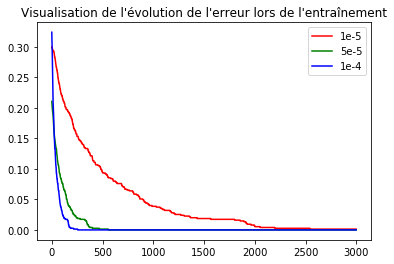

In [6]:
####  Visualisation de l'évolution de l'erreur lors de l'entraînement

plt.plot(range(3000), losses_1, color="red")
plt.plot(range(3000), losses_2, color="green")
plt.plot(range(3000), losses_3, color="blue")
plt.title("Visualisation de l'évolution de l'erreur lors de l'entraînement")
plt.legend(["1e-5", "5e-5", "1e-4"], loc ="upper right")
plt.show()

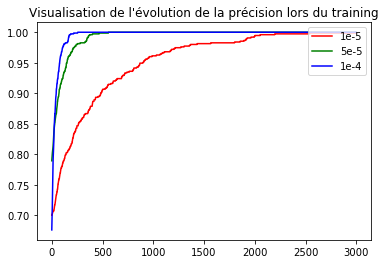

In [7]:
# Visualisation de l'accuracy

plt.plot(range(3000), accuracies_1, color="red")
plt.plot(range(3000), accuracies_2, color="green")
plt.plot(range(3000), accuracies_3, color="blue")
plt.title("Visualisation de l'évolution de la précision lors du training")
plt.legend(["1e-5", "5e-5", "1e-4"], loc ="upper right")

In [27]:
######   Test du modèle

def test_Perceptron(X_test):
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(P.predict(X_test[i]))
    return y_pred

y_pred = test_Perceptron(X_test)
MSE_Test = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"MSE Loss = {MSE_Test}\tAccuracy = {accuracy}")

MSE Loss = 0.0	Accuracy = 1.0


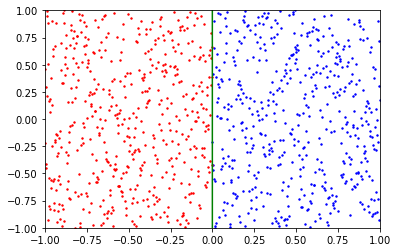

In [8]:
# Visualisation du modèle

x = np.linspace(-1, 1, 1000)

plt.scatter(x1.reshape((-1,1)), y1, color='blue', s=2)
plt.scatter(x2.reshape((-1,1)), y2, color='red', s=2)
plt.plot(x, a*x, color="green")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()